##Final Project - Clustering Method on Pizza Hut Nutritional Guide (K-Means & Gaussian Mixture Model)
####Name / NIM:
#####1. Elvina Putri Utama / 23101810040
#####2. Florence Ivanny Victoria / 23101810064
#####3. Priscillia Fayline / 23101810071
#####4. Richard Dika Renalchi / 23101810025
#####5. Sulaiman Yusuf / 23101810090
####Class: Business Mathematics A
#### Source Data: https://www.nutrition-charts.com/pizza-hut-nutrition-information/


#Informasi Data

Pada penelitian ini menggunakan data panduan nutrisi dalam menu "Medium Hand-Tossed Style Pizza" milik  Pizza Hut, yaitu ukuran 1 slice(1/8 pizza). 
Data tersebut meliputi 12 panduan nutrisi mulai dari Jumlah Protein, Kalori, Lemak, Karbohidrat, Kadar Gula, dan sebagainya. Data ini diolah dengan melakukan beberapa metode clustering yaitu k-means clustering, dan gaussian mixture model. Berikut ini merupakan proses pengolahan data berdasarkan clustering.

---
Sumber Data: https://www.nutrition-charts.com/pizza-hut-nutrition-information/


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt

from sklearn. preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
from plotnine import *
import matplotlib.pyplot as plt

from sklearn. preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

#Import Data

In [ ]:
ph=pd.read_excel('nutripizzahut.xlsx')   
ph

Pizza Hut Nutritional Guide  ...  Protein (g)
0                                   Cheese Only  ...           15
1                                     Pepperoni  ...           15
2                                       Supreme  ...           17
3                          Pepperoni & Mushroom  ...           14
4                   Italian Sausage & Red Onion  ...           15
5                               Ham & Pineapple  ...           13
6                                Veggie Lover's  ...           13
7                                 Meat Lover's®  ...           20
8                            Pepperoni Lover's®  ...           19
9                                 Hawaiian Luau  ...           15
10                               Dan's Original  ...           17
11                         Triple Meat Italiano  ...           18
12                               Spicy Sicilian  ...           15
13                      Ultimate Cheese Lover's  ...           16
14                  Cheese Only Garlic Parmesan  ...           15
15                    Pepperoni Garlic Parmesan  ...           15
16                      Supreme Garlic Parmesan  ...           17
17         Pepperoni & Mushroom Garlic Parmesan  ...           14
18  Italian Sausage & Red Onion Garlic Parmesan  ...           15
19              Ham & Pineapple Garlic Parmesan  ...           14
20              Veggie Lover's® Garlic Parmesan  ...           13
21                Meat Lover's® Garlic Parmesan  ...           20
22           Pepperoni Lover's® Garlic Parmesan  ...           19
23                Hawaiian Luau Garlic Parmesan  ...           16
24               Dan's Original Garlic Parmesan  ...           17
25         Triple Meat Italiano Garlic Parmesan  ...           18
26               Spicy Sicilian Garlic Parmesan  ...           16
27      Ultimate Cheese Lover's Garlic Parmesan  ...           16

[28 rows x 13 columns]

#Preview Data

In [ ]:
print('Number of Rows: ', ph.shape[0])
print('Number of Columns: ', ph.shape[1])

Number of Rows:  28
Number of Columns:  13


In [ ]:
ph.isnull().sum() 

Pizza Hut Nutritional Guide    0
Serving Grams                  0
Calories                       0
Calories from Fat              0
Total Fat (g)                  0
Saturated Fat (g)              0
Trans Fat (g)                  0
Cholesterol (g)                0
Sodium (g)                     0
Carbohydrates (g)              0
Dietary Fiber (g)              0
Sugars (g)                     0
Protein (g)                    0
dtype: int64

In [ ]:
ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Pizza Hut Nutritional Guide  28 non-null     object 
 1   Serving Grams                28 non-null     int64  
 2   Calories                     28 non-null     int64  
 3   Calories from Fat            28 non-null     int64  
 4   Total Fat (g)                28 non-null     int64  
 5   Saturated Fat (g)            28 non-null     float64
 6   Trans Fat (g)                28 non-null     float64
 7   Cholesterol (g)              28 non-null     float64
 8   Sodium (g)                   28 non-null     float64
 9   Carbohydrates (g)            28 non-null     int64  
 10  Dietary Fiber (g)            28 non-null     int64  
 11  Sugars (g)                   28 non-null     int64  
 12  Protein (g)                  28 non-null     int64  
dtypes: float64(4), int64(8

In [ ]:
ph.head()

Pizza Hut Nutritional Guide  Serving Grams  ...  Sugars (g)  Protein (g)
0                  Cheese Only            123  ...           5           15
1                    Pepperoni            121  ...           5           15
2                      Supreme            152  ...           6           17
3         Pepperoni & Mushroom            131  ...           5           14
4  Italian Sausage & Red Onion            142  ...           6           15

[5 rows x 13 columns]

In [ ]:
ph.tail()

Pizza Hut Nutritional Guide  ...  Protein (g)
23            Hawaiian Luau Garlic Parmesan  ...           16
24           Dan's Original Garlic Parmesan  ...           17
25     Triple Meat Italiano Garlic Parmesan  ...           18
26           Spicy Sicilian Garlic Parmesan  ...           16
27  Ultimate Cheese Lover's Garlic Parmesan  ...           16

[5 rows x 13 columns]

#EDA

In [ ]:
ph.describe()

Serving Grams    Calories  ...  Sugars (g)  Protein (g)
count      28.000000   28.000000  ...   28.000000    28.000000
mean      138.000000  352.857143  ...    5.571429    15.964286
std        10.828631   40.538701  ...    0.741798     2.008909
min       118.000000  290.000000  ...    5.000000    13.000000
25%       131.000000  320.000000  ...    5.000000    15.000000
50%       140.500000  350.000000  ...    5.000000    15.500000
75%       144.500000  380.000000  ...    6.000000    17.000000
max       154.000000  440.000000  ...    7.000000    20.000000

[8 rows x 12 columns]

Berdasarkan hasil diatas, menyimpulkan bahwa nutrisi paling banyak yang terdapat dalam pizza adalah Sodium yaitu Natrium. Dimana bahan utama pizza yaitu seperti olahan daging, saos, keju, dan adonan mengandung natrium yang tinggi

In [ ]:
ph.groupby('Protein (g)').count()

Pizza Hut Nutritional Guide  ...  Sugars (g)
Protein (g)                               ...            
13                                     3  ...           3
14                                     3  ...           3
15                                     8  ...           8
16                                     4  ...           4
17                                     4  ...           4
18                                     2  ...           2
19                                     2  ...           2
20                                     2  ...           2

[8 rows x 12 columns]

Dari 28 macam menu pizza, terdapat 16 pizza yang memiliki kadar gula yang terendah yaitu 5 gram. Dimana ukuran kadar tersebut seperti itu masih berada di batas kewajaran.

In [ ]:
ph.groupby('Sugars (g)').median()

Serving Grams  Calories  ...  Dietary Fiber (g)  Protein (g)
Sugars (g)                           ...                                
5                   135.5     365.0  ...                2.0         16.5
6                   143.5     350.0  ...                2.0         15.0
7                   136.5     320.0  ...                2.0         14.5

[3 rows x 11 columns]

In [ ]:
ph.groupby('Sugars (g)').mean()

Serving Grams  Calories  ...  Dietary Fiber (g)  Protein (g)
Sugars (g)                           ...                                
5                 134.625   365.625  ...             1.9375       16.750
6                 145.625   345.000  ...             2.0000       15.125
7                 136.250   317.500  ...             2.0000       14.500

[3 rows x 11 columns]

In [ ]:
ph.groupby('Sugars (g)').std()

Serving Grams   Calories  ...  Dietary Fiber (g)  Protein (g)
Sugars (g)                            ...                                
5               12.365948  41.947388  ...               0.25     2.049390
6                4.438066  33.380918  ...               0.00     1.552648
7                4.991660  26.299556  ...               0.00     1.290994

[3 rows x 11 columns]

#Outlier (Boxplot)

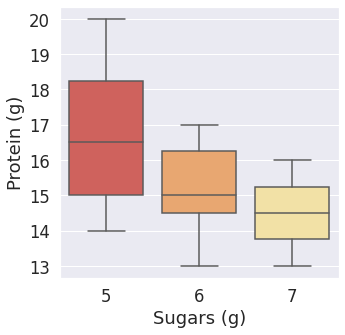

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=ph['Sugars (g)'], y=ph['Protein (g)'])
plt.show()

Berdasarkan pola dalam boxplot, kandungan yang ada dalam pizza terdapat kadar gula sebanyak 5 gram dengan rata-rata jumlah protein 16.5 gram. Sedangkan pizza yang mengandung kadar gula terbanyak yakni 7 gram, memiliki kadar protein yang sedikit yaitu sebesar 14.5 gram

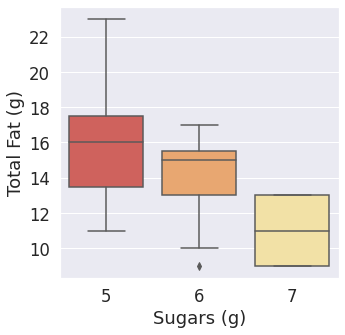

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=ph['Sugars (g)'], y=ph['Total Fat (g)'])
plt.show()

Berdasarkan pola dalam boxplot, menyimpulkan bahwa terdapat outlier yaitu terdapat pada kadar gula sebanyak 6 gram dengan komposisi lemak dibawah 10 gram, yakni tergolong menu pizza yang rendah lemak

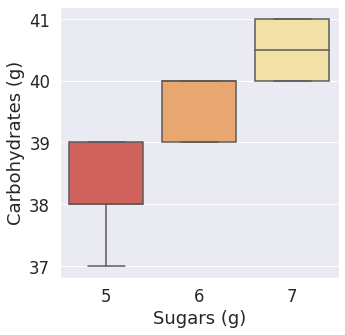

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=ph['Sugars (g)'],y=ph['Carbohydrates (g)'])
plt.show()

Berdasarkan pola dalam boxplot, menyimpulkan bahwa tidak ada outlier dalam komposisi gula dan karbohidrat

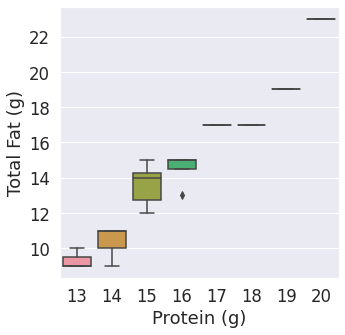

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=ph['Protein (g)'],y=ph['Total Fat (g)'])
plt.show()

Berdasarkan pola dalam boxplot, terdapat outlier yaitu pada komposisinya protein sebanyak 16 gram, sedangkan komposisi lemak yaitu sebanyak 13 gram

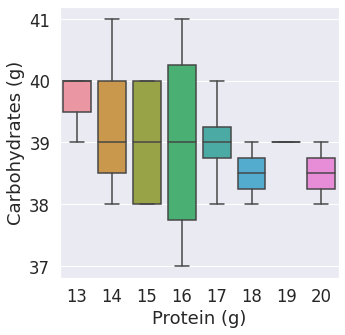

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=ph['Protein (g)'],y=ph['Carbohydrates (g)'])
plt.show()

Berdasarkan pola dalam boxplot, masing-masing pizza memiliki kadar protein yang berbeda-beda dan hampir semua menu mengandung jumlah karbohidrat yang sama yaitu 39 gram.

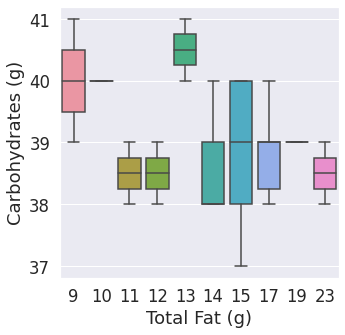

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
sns.boxplot(x=ph['Total Fat (g)'],y=ph['Carbohydrates (g)'])
plt.show()

Berdasarkan pola dalam boxplot, masing-masing pizza memiliki kadar kandungan lemak dan kadar karbohidrat yang berbeda-beda. Yang memiliki range terbesar adalah kadar kandungan lemak sebanyak 15 gram dengan ukuran karbohidrat median yaitu 39 gram

In [ ]:
ph.corr()

Serving Grams  Calories  ...  Sugars (g)  Protein (g)
Serving Grams           1.000000  0.514663  ...    0.216708     0.435855
Calories                0.514663  1.000000  ...   -0.425792     0.969992
Calories from Fat       0.474683  0.987531  ...   -0.453618     0.949430
Total Fat (g)           0.482282  0.990166  ...   -0.474195     0.957394
Saturated Fat (g)       0.401878  0.957582  ...   -0.448274     0.945484
Trans Fat (g)           0.499518  0.584276  ...   -0.113228     0.533075
Cholesterol (g)         0.415087  0.972912  ...   -0.470841     0.971611
Sodium (g)              0.538242  0.915342  ...   -0.269667     0.909822
Carbohydrates (g)       0.397016 -0.231169  ...    0.820801    -0.257622
Dietary Fiber (g)       0.361969  0.013813  ...    0.150970    -0.003484
Sugars (g)              0.216708 -0.425792  ...    1.000000    -0.458017
Protein (g)             0.435855  0.969992  ...   -0.458017     1.000000

[12 rows x 12 columns]

#K-Means

Build Model

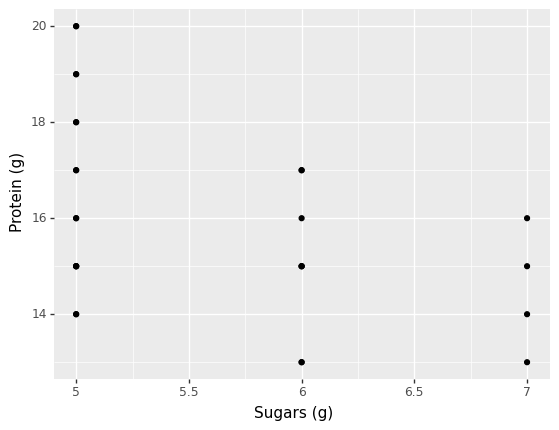

<ggplot: (8777633780661)>

In [ ]:
features=["Sugars (g)","Protein (g)","Total Fat (g)","Carbohydrates (g)"]
X=ph[features]
(ggplot(X, aes("Sugars (g)","Protein (g)")) + geom_point())

Berdasarkan pola di atas, pola dalam sugars (g) dan protein (g) tidak memiliki hubungan yang signifikan. Hal ini dikarenakan terbukti dari hasil korelasi antara keduanya adalah -0,4.

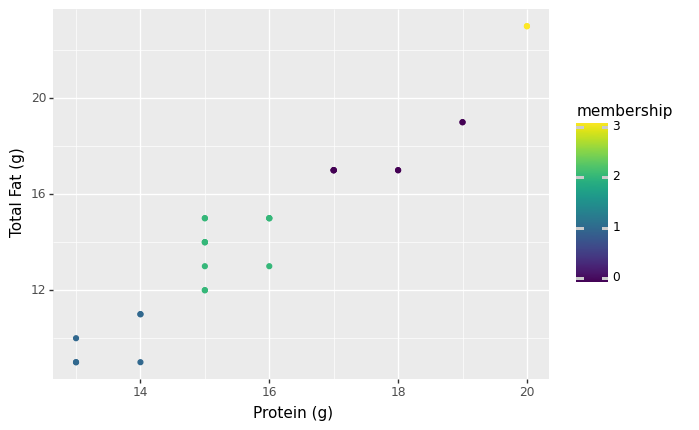

<ggplot: (8777633771585)>

In [ ]:
km=KMeans(n_clusters=4)
km.fit(X)

membership=km.predict(X)

X["clusters"] = membership

(ggplot(X, aes("Protein (g)","Total Fat (g)",color="membership")) + geom_point())

Berdasarkan plot di atas, terlihat beberapa cluster yaitu 0,1,2,3 yang sesuai dengan warna plot tersebut.

Evaluate Model

In [ ]:
silhouette_score(X[["Protein (g)","Total Fat (g)"]],membership)

0.6268017240104558

Setelah dilakukan perhitungan dengan silhouette score diperoleh koefisien sebesar 0,5305741525238117 untuk rata-rata Sugars (g) dengan Protein (g).

In [ ]:
features=["Sugars (g)","Protein (g)","Total Fat (g)","Carbohydrates (g)"]

X=ph[features]

z=StandardScaler()

X[features]=z.fit_transform(X)

km=KMeans(n_clusters=4)
km.fit(X)

membership = km.predict(X)

silhouette_score(X,membership)

0.40140922272513907

Setelah dilakukan perhitungan dengan silhouette score diperoleh koefisien sebesar 0,40140922272513907 untuk rata-rata Sugars (g), Protein (g), Total Fat (g), Carbohydrates (g).

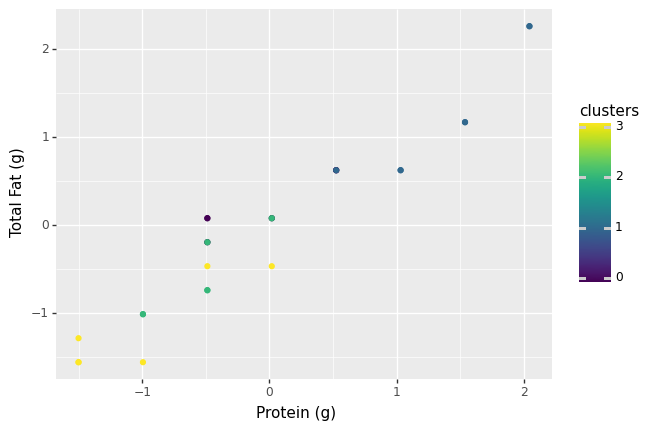

<ggplot: (8777633780501)>

In [ ]:
X["clusters"]=membership
(ggplot(X, aes("Protein (g)","Total Fat (g)",color="clusters")) + geom_point())

Visualisasi diatas menunjukkan peletakan cluster-cluster sesuai dengan warna yang ada.

Visualization

Pertama, kami membuat kumpulan data dua dimensi yang berisi empat gumpalan berbeda. Untuk menekankan bahwa ini adalah algoritme tanpa pengawasan, kami akan mengabaikan label dari visualisasi:

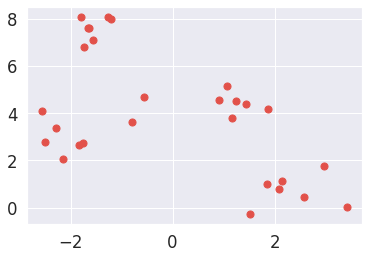

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=28, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Secara kasat mata, relatif mudah untuk memilih empat kelompok. Algoritme k-means melakukan ini secara otomatis, dan di Scikit-Learn menggunakan API estimator tipikal:

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Selanjutnya, kami visualisasikan hasilnya dengan memplot data yang diwarnai oleh label-label ini. Kami juga akan memplot pusat cluster seperti yang ditentukan oleh estimator k-means:

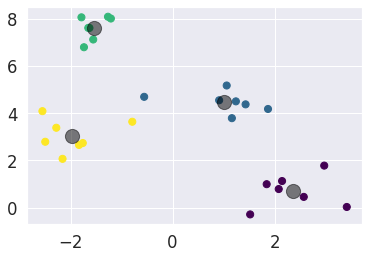

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

"Pusat cluster" adalah rata-rata aritmatika dari semua titik yang termasuk dalam cluster. Setiap titik lebih dekat ke pusat klasternya sendiri daripada ke pusat klaster lainnya.

Kemudian, algoritma k-Means cukup sederhana sehingga kita dapat menuliskannya dalam beberapa baris kode. Berikut ini adalah implementasi yang sangat mendasar:

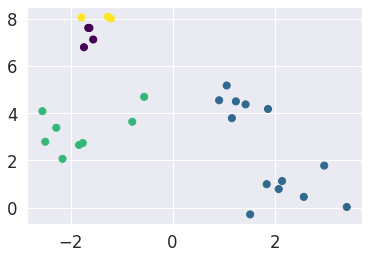

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Berdasarkan gambar di atas, implementasi yang paling teruji akan melakukan sedikit lebih banyak, tetapi fungsi sebelumnya memberikan inti dari pendekatan ekspektasi-maksimalisasi.

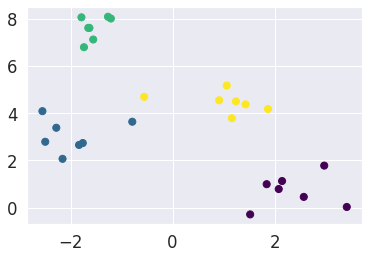

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Di sini dari gambar di atas, pendekatan telah konvergen, tetapi belum konvergen ke konfigurasi optimal global. Karena alasan ini, biasanya algoritma dijalankan untuk beberapa tebakan awal, seperti yang dilakukan Scikit-Learn.

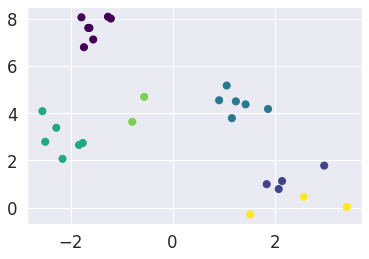

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Sebagai contoh, pertimbangkan beberapa data yang dihasilkan dari fungsi make_moons Scikit-Learn, yang kita lihat di In Depth: K-Means Clustering:

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(28, noise=.05, random_state=0)

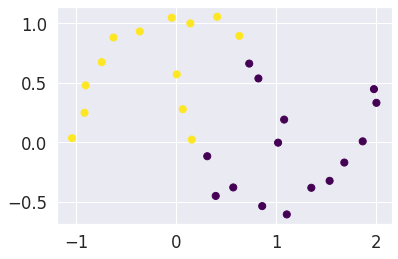

In [ ]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Jika kami mencoba menyesuaikan ini dengan GMM dua komponen yang dilihat sebagai model pengelompokan, hasilnya seperti ini:

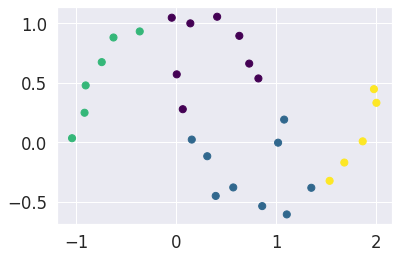

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Kami melihat bahwa dengan pendekatan transformasi kernel ini, k-means yang terkernelisasi dapat menemukan batas nonlinier yang lebih rumit antar klaster.

In [ ]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

Metode Elbow kemudian digunakan untuk memilih nilai K terbaik. Pada penggambaran di bawah ini kita dapat melihat bahwa setelah 4 tidak ada penurunan WCSS yang signifikan sehingga 4 adalah yang terbaik di sini. Oleh karena itu ada bentuk siku yang terbentuk dan biasanya ide yang baik untuk memilih nomor di mana siku ini terbentuk seperti di bawah ini:

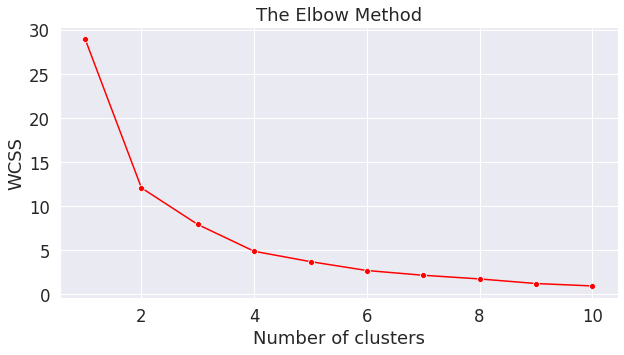

In [ ]:
#Elbow Criterion
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

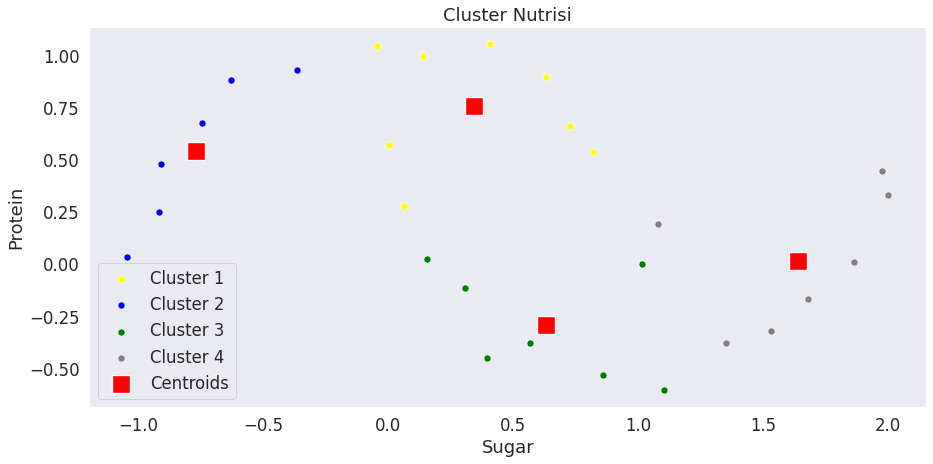

In [ ]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Cluster Nutrisi')
plt.xlabel('Sugar')
plt.ylabel('Protein')
plt.legend()
plt.show()

In [ ]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(X) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

P1        P2
0  0.288266 -0.961241
1 -0.997711  0.034664

Untuk menstandarisasi data akhirnya diperoleh besar P1 dan P2 yang telah di standarisasi.

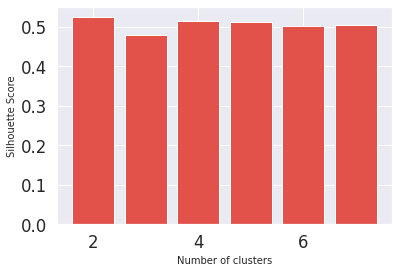

In [ ]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

Skor Koefisien Silhouette yang lebih tinggi berkaitan dengan model dengan klaster yang lebih jelas. Oleh karena itu, klaster yang terbaik adalah 4.

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_principal)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

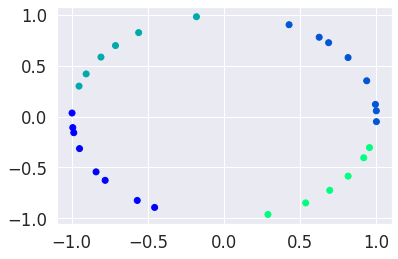

In [ ]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 4).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

Visualisasi pola clustering dengan bentuk melingkar.

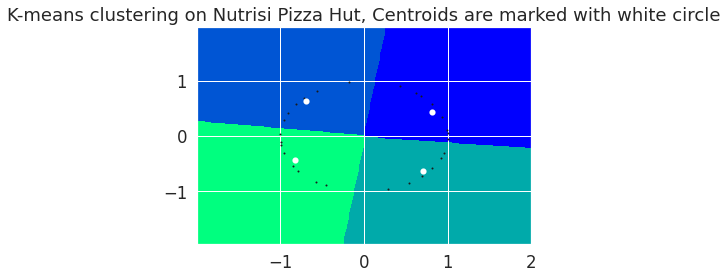

In [ ]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_principal['P1'].min() - 1, X_principal['P1'].max() + 1
y_min, y_max = X_principal['P2'].min() - 1, X_principal['P2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.

# https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
# https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
# https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.winter,
           aspect='auto', origin='lower')

plt.plot(X_principal['P1'], X_principal['P2'], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=10, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Nutrisi Pizza Hut, '
          'Centroids are marked with white circle')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

#Gaussian Mixture Models

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from plotnine import *
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
%matplotlib inline

In [ ]:
features=['Sugars (g)','Protein (g)','Total Fat (g)','Carbohydrates (g)']
X=ph[features]

In [ ]:
EM= GaussianMixture(n_components =4)
EM.fit(X)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
cluster=EM.predict(X)
cluster

array([0, 0, 1, 0, 3, 2, 2, 1, 0, 3, 0, 0, 3, 0, 0, 0, 1, 0, 3, 2, 2, 1,
       0, 3, 0, 0, 3, 0])

In [ ]:
silhouette_score(X, cluster)

0.1560618558912656

Berdasarkan silhouette score metode Gaussian Mixture Method, metode clustering yang dilakukan sudah cukup akurat (sudah mendekati 0.5, objek sudah mendekati ke cluster masing-masing). Semakin tinggi value silhouette (antara -1 dan +1), maka semakin akurat metode clustering yang sudah dilakukan, juga setiap objek cukup mencerminkan sifat dari setiap cluster.

In [ ]:
X['cluster']=cluster

In [ ]:
'Sugars (g)','Protein (g)','Total Fat (g)','Carbohydrates (g)'

('Sugars (g)', 'Protein (g)', 'Total Fat (g)', 'Carbohydrates (g)')

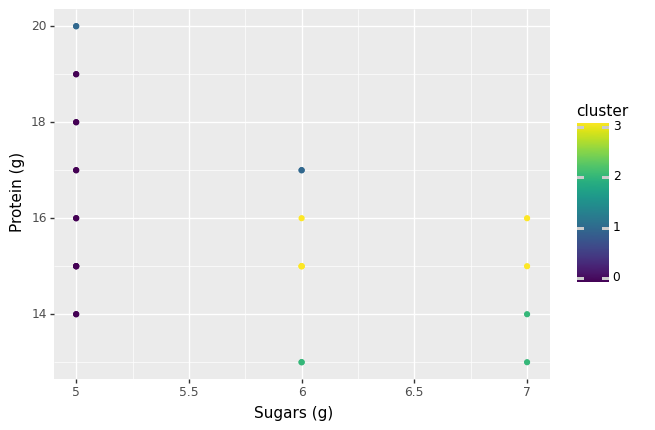

<ggplot: (8777633428193)>

In [ ]:
(ggplot(X, aes(x='Sugars (g)',y='Protein (g)', color='cluster'))+geom_point())

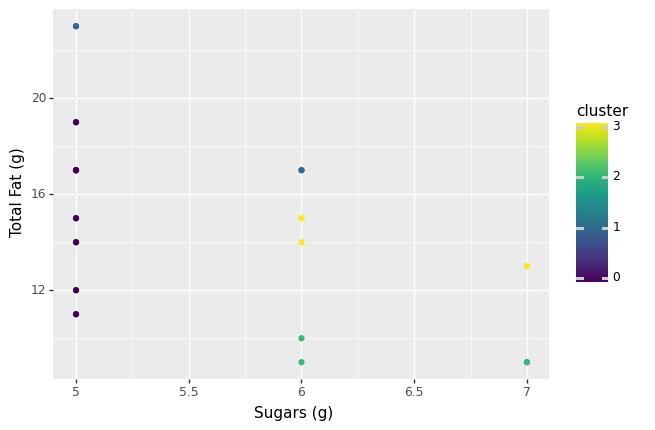

<ggplot: (8777633428149)>

In [ ]:
(ggplot(X, aes(x='Sugars (g)',y='Total Fat (g)', color='cluster'))+geom_point())

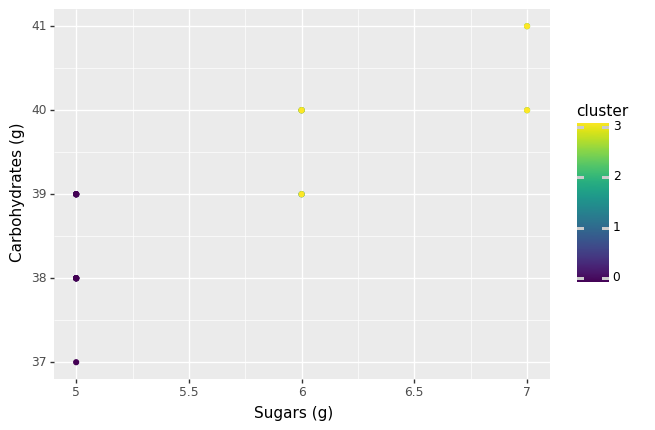

<ggplot: (8777633513393)>

In [ ]:
(ggplot(X, aes(x='Sugars (g)',y='Carbohydrates (g)', color='cluster'))+geom_point())

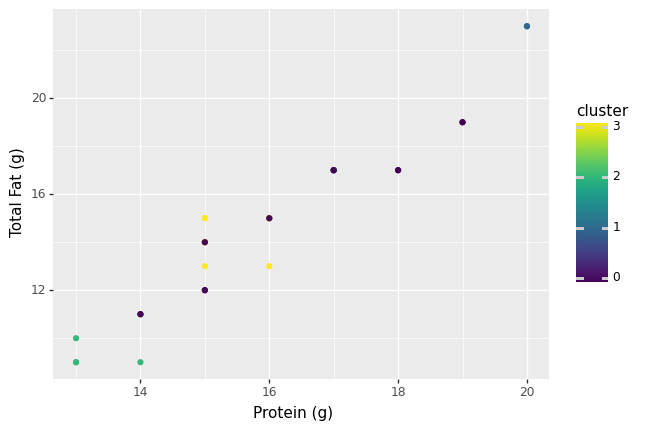

<ggplot: (8777633599097)>

In [ ]:
(ggplot(X, aes(x='Protein (g)',y='Total Fat (g)', color='cluster'))+geom_point())

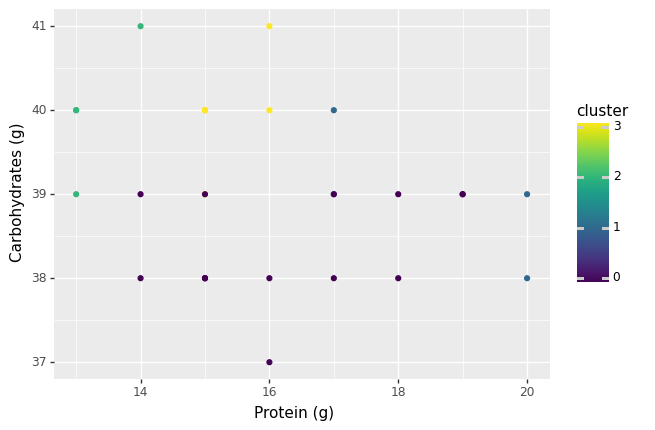

<ggplot: (8777633670337)>

In [ ]:
(ggplot(X, aes(x='Protein (g)',y='Carbohydrates (g)', color='cluster'))+geom_point())

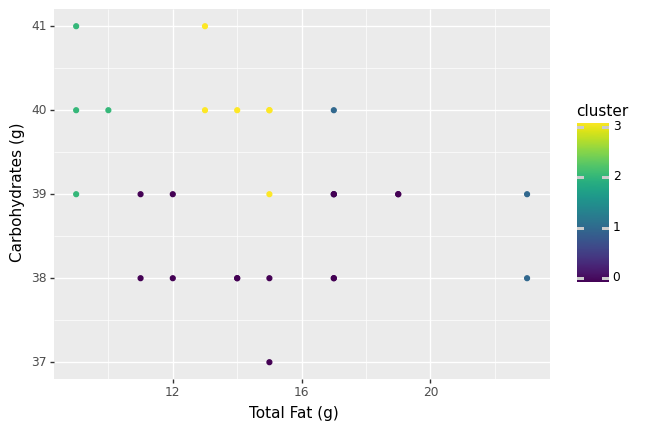

<ggplot: (8777633573997)>

In [ ]:
(ggplot(X, aes(x='Total Fat (g)',y='Carbohydrates (g)', color='cluster'))+geom_point())

#AIC , BIC

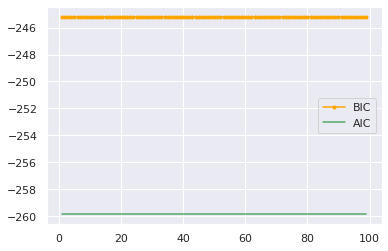

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture as GMM
import matplotlib.pyplot as plt

ph = pd.read_excel (r'nutripizzahut.xlsx')
b=ph['Sugars (g)'].values.reshape(-1,1)
b=np.log(b)
####### finding best n_components ########
k= np.arange(1,100,1)
clfs= [GMM(4,covariance_type='full').fit(b) for n in k]
aics= [clf.aic(b) for clf in clfs]
bics= [clf.bic(b) for clf in clfs]
plt.plot(k,bics,color='orange',marker='.',label='BIC')
plt.plot(k,aics,color='g',label='AIC')
plt.legend()
plt.show()

Best number of K by BIC is 0
Best number of K by AIC is 0


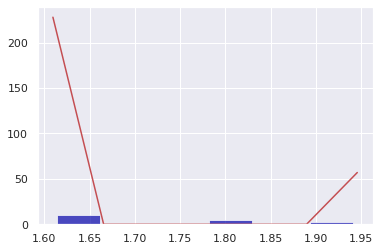

In [ ]:
clf=GMM(28,covariance_type='full').fit(b)
n, bins, patches = plt.hist(b,bins='auto',density=True,color='#0504aa',alpha=0.7, rwidth=0.85)
xpdf=np.linspace(b.min(),b.max(),len(bins)).reshape(-1,1)
density= np.exp(clf.score_samples(xpdf))
plt.plot(xpdf,density,'-r')
print("Best number of K by BIC is", bics.index(min(bics)))
print("Best number of K by AIC is", aics.index(min(aics)))

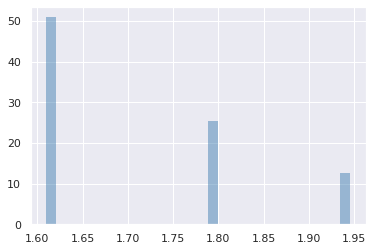

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
clf = GMM(4, max_iter=500, random_state=3).fit(b)
xpdf = np.linspace(-10, 20, 1000)

plt.hist(b, bins=30, density=True, alpha=0.5,
                histtype='stepfilled', color='steelblue',
                edgecolor='none');

Pada grafik ini terdapat 3 komponen pada data gula dalam panduan nutrisi pizza

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
clf = GMM(4, max_iter=500, random_state=3).fit(b)
xpdf = np.linspace(-10, 20, 1000)

In [ ]:
clf.means_

array([[1.60943791],
       [1.94591015],
       [1.79175947],
       [0.        ]])

In [ ]:
clf.covariances_ #merupakan ukuran lebar pada gaussian model pada multiple dimension

array([[[1.e-06]],

       [[1.e-06]],

       [[1.e-06]],

       [[1.e-06]]])

In [ ]:
clf.weights_

array([5.71428571e-01, 1.42857143e-01, 2.85714286e-01, 7.93016446e-17])

Fungsi pada gaussian mixture models apabila menggunakan metode AIC dan BIC adalah untuk mengecek overfitting yaitu penyesuaian model yang berlebihan
Apabila nilai AIC atau BIC besar maka terjadi overfitting begitupun sebaliknya

---


*   Aikaki Information Criterion (AIC) merupakan ukuran penyesuaian model yang terbaik pada model statistik untuk menemukan model yang belum diketahui dimana realitas dimensinya tinggi serta menyimpulkan bahwa prediksi yang salah akan sesuai  (false negatif)
*   Bayesian Information Criterion (BIC) merupakan jenis penyesuaian parametric model yang memiliki jumlah parameter yang berbeda. Memiliki estimasi yang konsisten dimana terbukti dalam proses data (false positif)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
# If this causes an error, you can comment it out.
import seaborn as sns
sns.set()

In [ ]:
print(clf.bic(b))
print(clf.aic(b))

-245.2002942493089
-259.85454386123615


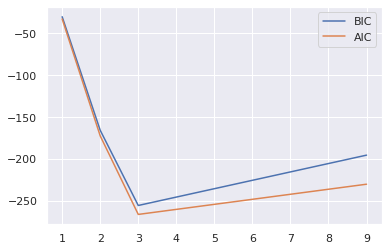

In [ ]:
n_estimators = np.arange(1, 10)
clfs = [GMM(n, max_iter=1000).fit(b) for n in n_estimators]
bics = [clf.bic(b) for clf in clfs]
aics = [clf.aic(b) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.legend();

Berdasarkan hasil grafik AIC dan BIC, terlihat bahwa pola BIC lebih simple dibandingkan model AIC. Selain itu juga menyimpulkan bahwa terdapat 3 komponen pada Gaussian Model. Hal ini dilihat berdasarkan hasil minimum dari BIC dan AIC.
Penjelasan: Terdapat 3 macam komponen gula yang dikelompokkan yaitu 5 gram, 6 gram dan 7 gram. Maka hasil GMM dinilai baik pada density estimator

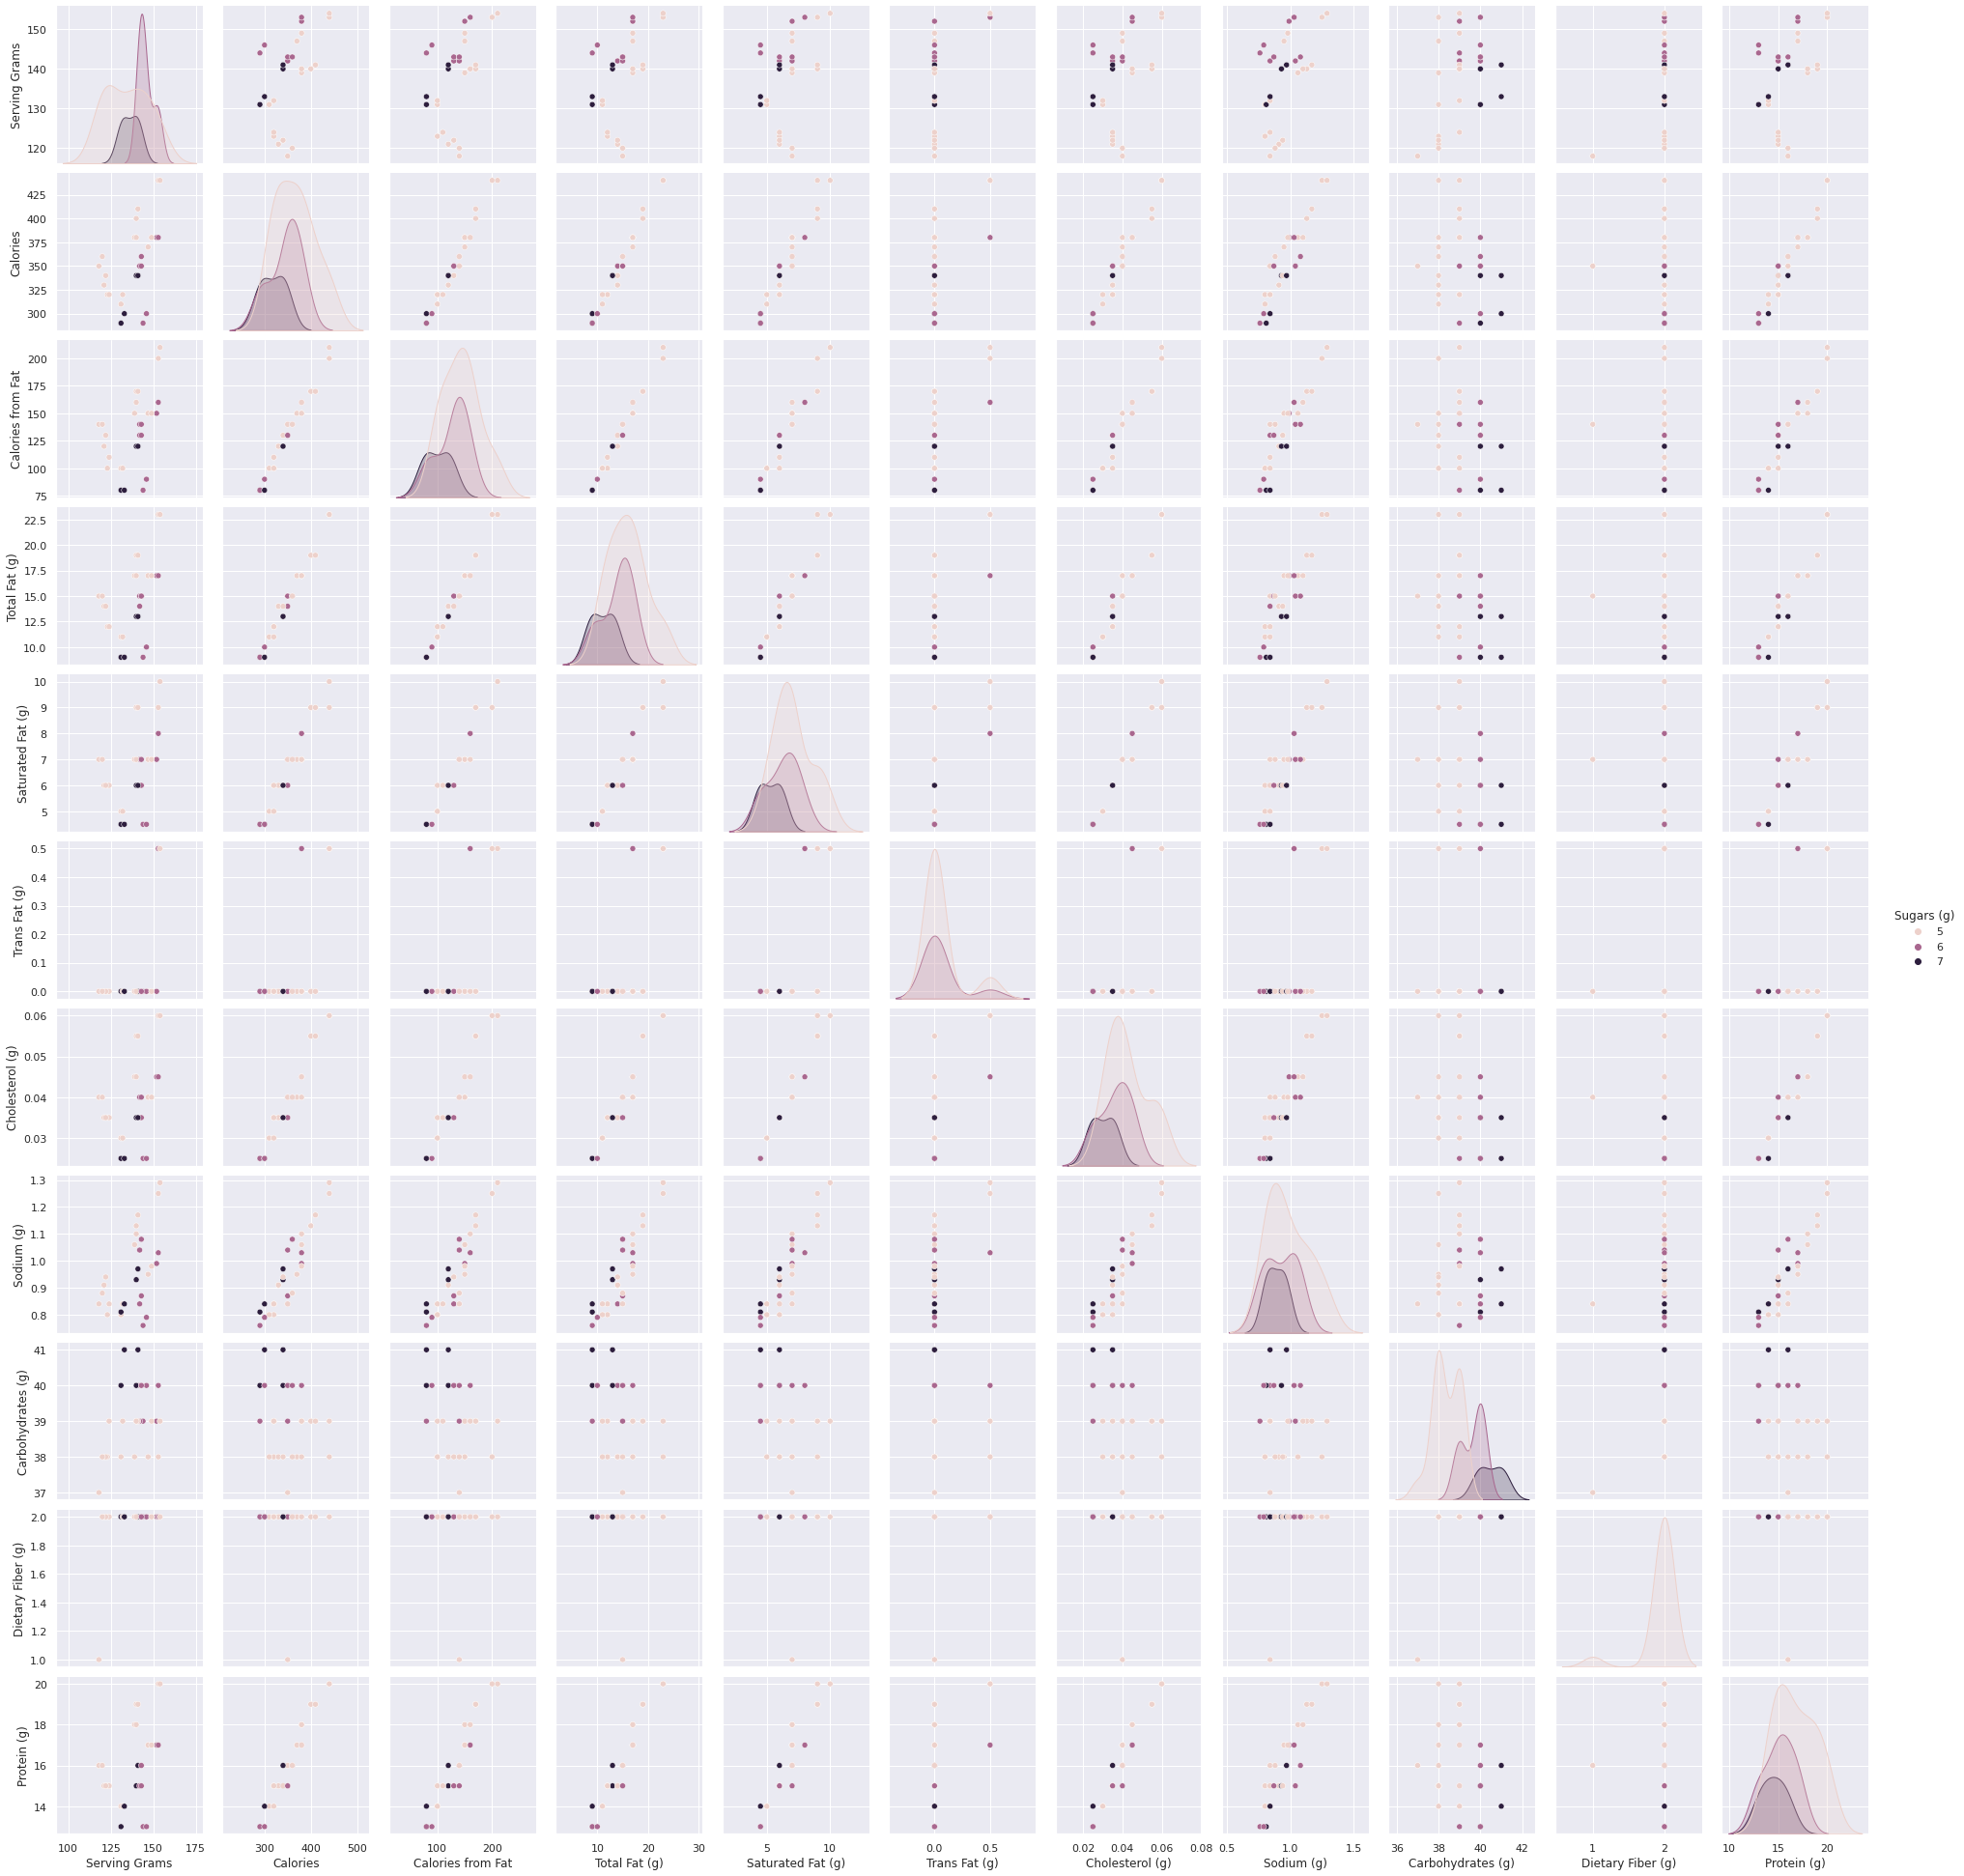

In [ ]:
# Shows the relationship of each figure

sns.pairplot(hue="Sugars (g)",data=ph)

#KDE Plot

Berfungsi untuk memvisualkan pada data clustering nutrisi pizza dengan bentuk kurva. KDE mengestimasi pada fungsi probability density. 

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

##Univariate Plot

Dibawah ini adalah grafik dengan menggunakan satu dimensi

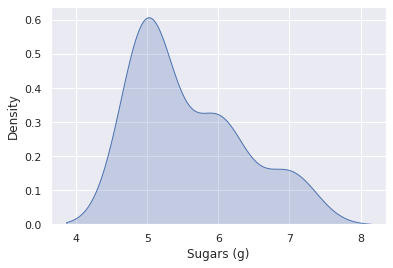

In [ ]:
sns.kdeplot(ph['Sugars (g)'],shade=True);

##Bandwith

Merupakan standar deviasi pada kernel smoothing

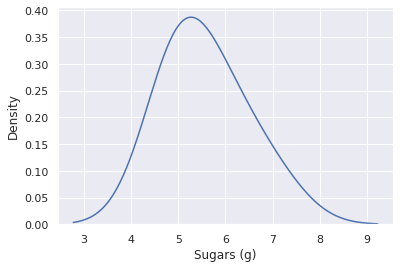

In [ ]:
sns.kdeplot(ph['Sugars (g)'],bw=1); #bandwith

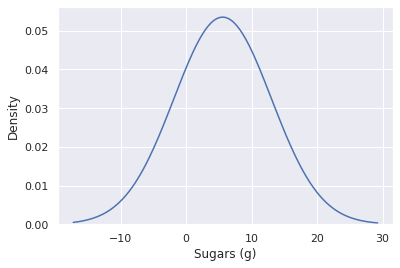

In [ ]:
sns.kdeplot(ph['Sugars (g)'],bw=10); #bandwith

Apabila bandwith makin besar, maka distribusi pada model akan lebih smooth (mulus)

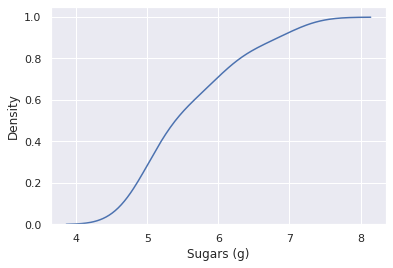

In [ ]:
sns.kdeplot(ph['Sugars (g)'],cumulative=True);

Merupakan data kumulative yaitu CDF

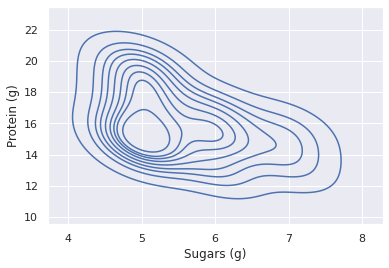

In [ ]:
sns.kdeplot(ph['Sugars (g)'],ph['Protein (g)']);

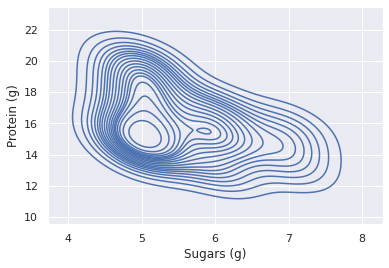

In [ ]:
sns.kdeplot(ph['Sugars (g)'],ph['Protein (g)'],n_levels=20);

Level untuk menambahkan nilai kontur pada gambar kontur yaitu komposisi pada parameter sugars

##Bivariate

Dibawah ini adalah grafik dengan menggunakan dua dimensi yaitu berbentuk kontur
Untuk mengestimasi joint probability density function

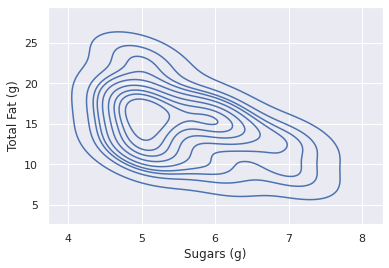

In [ ]:
sns.kdeplot(ph['Sugars (g)'],ph['Total Fat (g)']);

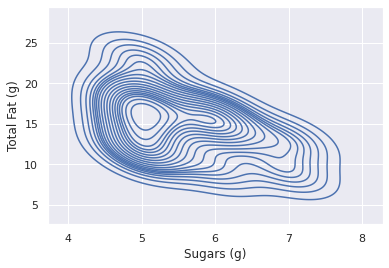

In [ ]:
sns.kdeplot(ph['Sugars (g)'],ph['Total Fat (g)'],n_levels=20);

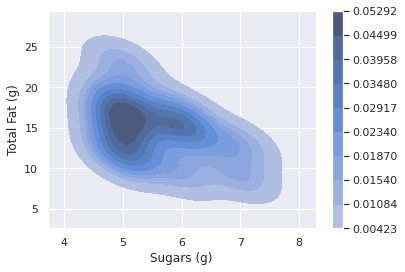

In [ ]:
sns.kdeplot(ph['Sugars (g)'],ph['Total Fat (g)'],shade=True,shade_lowest=False,cbar=True);

Pada grafik diatas, melakukan shading pada seluruh tingkat density yang terendah, dimana ukurannya digolongkan berdasarkan tingkat kegelapan warna yang berbeda.

Kesimpulan: 

Data pada daftar nutrisi Pizza Hut, hal ini dilihat dari kedua metode clustering yaitu K-means dan Gaussian Mixture Model bahwa hasil dari kedua metode clustering memiliki hasil yang tidak jauh berbeda. Terdapat 4 clustering yang dari hasilsilhouette value yang masing-masing modelnya memiliki tinggi yang hampir sama dan metode elbow. Berdasarkan nilai AIC dan BIC telah menghasilkan 3 komponen pada Gaussian Model, hal ini terbukti pada jumlah kategori yang terdapat pada "Sugar(g)" yakni 5 gram, 6 gram dan 7 gram. Karena hasil k-means dan gaussian model tidak berbeda jauh, maka sebaiknya menggunakan metode k-means karena prosesnya lebih simple.